# The Data

The work performed herein was built off of the shoulders of giants, the original project that created the dataset and labeled the images. Here follows an excerpt from their site describing the data.

> [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.4002935.svg)](https://doi.org/10.5281/zenodo.4002935)
>__Project member(s)__:\
>Topher Allen; Zach Anderson; Berlin Chen; Ameya Daigavane; Annie Didier; Marko Green; Paul Horton; Hannah Kerner; Lauren Klein; Benjamin Kolber; Ellie Kuang; Kyle Kung; Jake Lee; Justin Martia; Brian Milch; James Montgomery; Kyle Pearson; Sanjna Ravichandar; Arun Viswanathan; Caleb Wagner; Amruta Yelamanchili; Brandon Zhao
>
>__Abstract__:\
>This dataset contains a total of 64,947 landmark images that were detected and extracted from HiRISE browse images, spanning 232 separate source images.
>
>This set was formed from 10,815 original landmarks. Each original landmark was cropped to a square bounding box that included the full extent of the landmark plus a 30-pixel margin to the left, right, top, and bottom. Each landmark was then resized to 227x227 pixels. 9,022 of these images were then augmented to generate 6 additional landmarks using the following methods:
>
>90 degrees clockwise rotation
>180 degrees clockwise rotation
>270 degrees clockwise rotation
>Horizontal flip
>Vertical flip
>Random brightness adjustment
>The remaining 1,793 images were not augmented. Combining these with the 7*9,022 images, gives a total of 64,947 separate images.
>
> __Contents__:
>- map-proj-v3_2/: Directory containing individual cropped landmark images
>- labels-map-proj-v3_2.txt: Class labels (ids) for each landmark image. File includes two columns separated by a space: filename, class_id
>- labels-map-proj-v3_2_train_val_test.txt: Includes train/test/val labels and upsampling used for trained model. File includes three columns separated by a space: filename, class_id, set
>- landmarks_map-proj-v3_2_classmap.csv: Dictionary that maps class ids to semantic names
>
> __Class Discussion__:\
>We give a discussion of the various landmarks that make up our classes.
>
>Bright dune and dark dune are two sand dune classes found on Mars. Dark dunes are completely defrosted, whereas bright dunes are not. Bright dunes are generally bright due to overlying frost and can exhibit black spots where parts of the dune are defrosting.
>
>The crater class consists of crater images in which the diameter of the crater is greater than or equal to 1/5 the width of the image and the circular rim is visible for at least half the crater's circumference.
>
>The slope streak class consists of images of dark flow-like features on slopes. These features are believed to be formed by a dry process in which overlying (bright) dust slides down a slope and reveals a darker sub-surface.
>
>Impact ejecta refers to material that is blasted out from the impact of a meteorite or the eruption of a volcano. We also include cases in which the impact cleared away overlying dust, exposing the underlying surface. In some cases, the associated crater may be too small to see. Impact ejecta can also include lava that spilled out from the impact (blobby ("lobate") instead of blast-like), more like an eruption (triggered by the impact). Impact ejecta can be isolated, or they can form in clusters when the impactor breaks up into multiple fragments.
>
>Spiders and Swiss cheese are phenomena that occur in the south polar region of Mars. Spiders have a central pit with radial troughs, and they are believed to form as a result of sublimation of carbon dioxide ice. This process can produce mineral deposits on top, which look like dark or light dust that highlights cracks in the CO2 ice. Spiders can resemble impact ejecta due to their radial troughs, but impact ejecta tends to have straight radial jets that fade as they get farther from the center. The spider class also includes fan-like features that form when a geyser erupts through the CO2 layer and the material is blown by the wind away from the cracks. Fans are typically unidirectional (following the wind direction), whereas impact ejecta often extends in multiple directions. Swiss cheese is a terrain type that consists of pits that are formed when the sun heats the ice making it sublimate (change solid to gas).
>
>Other is a catch-all class that contains images that fit none of the defined classes of interest. This class makes up the majority of our data set.


# Business Understanding

Space exploration and understanding has been growing over the last few decades with the spark being lit during the space race during the latter half of the 20th century. After the end of the Apollo space program, man's venture into space has been relegated to low earth orbit missions.  

Unmanned missions have since had many a success story such as the Voyager 2 going interstellar in 2018, over 40 years after its launch. The future of space exploration is going to be handled by such manned missions for the foreseeable future. However, being physically on site isn't the only way to explore space.  

For centuries, man has looked up at the night sky to find out more about our celestial neighbors. With improvements in technologies our ability to gather data through telescopes and cameras has improved significantly and the value provided by telescopes in space has been immeasurable. The James Webb (infrared) telescope was launched in December 2021 and hopes to view objects too old, distant, and faint for the Hubble Space Telescope.

Pointing the telescope and gathering data is only the first step. Being able to parse terabytes, petabytes or even yottabytes of data manually is a nigh impossible task, a task computer vision is especially suited for. Being able to identify interesting features can help us whittle down potential candidates to explore 'in-person' and in the long run help mitigate losses.

Interest in space exploration has seen a resurgence with private enterprise taking an interest. Although this project specifically looks at the Mars topography, similar techniques can be applied to any celestial body, or even to our home planet.

# Overview
We shall be using images captured from the HiRISE camera system on board the Mars Reconnaisance Orbiter which was built under direction from University of Arizona's Lunar and Planetary Laboratory. Following is an excerpt from the [University of Arizona website](https://www.lpl.arizona.edu/missions/hirise-mro).

>The **Hi**gh **R**esolution **I**maging **S**cience **E**xperiment (HiRISE) onboard the Mars Reconnaissance Orbiter, is the most powerful camera ever sent to another planet. The resolution of the camera allows us to see the Red Planet in amazing detail, and lets other missions, like the Mars Science Laboratory, find a safe place to land and carry out amazing science. The operations center, which includes not only observation planning, but the execution of commands sent to the spacecraft along with actual image processing, is located within LPL at the University of Arizona.

We shall be building off of the work performed by the original team. The dataset comes pre-augmented and segmented into training, validation and test sets. The test side will be set aside to ascertain effectiveness of our final model. The training set will be used to train the model and the validation scores on the validation set will be used as a metric to pick our model, specifically our validation loss.

# LeNet

LeNet-5, and its different variations were the brainchild of Yann LeCun and is one of the earliest uses of the CNN model. It was used to recognize hand written digits in the MNIST dataset. The original paper with collaborators Léon Bottou, Yoshua Bengio, and Patrick Haffner can be found here [Gradient-Based Learning Applied to Document Recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)

Here is an abstract of the original paper
>Multilayer neural networks trained with the back-propagation algorithm constitute the best example of a successful gradient based learning technique. Given an appropriate network architecture, gradient-based learning algorithms can be used to synthesize a complex decision surface that can classify high-dimensional patterns, such as handwritten characters, with minimal preprocessing. This paper reviews various methods applied to handwritten character recognition and compares them on a standard handwritten digit recognition task. Convolutional neural networks, which are specifically designed to deal with the variability of 2D shapes, are shown to outperform all other techniques. Real-life document recognition systems are composed of multiple modules including field extraction, segmentation recognition, and language modeling. A new learning paradigm, called graph transformer networks (GTN), allows such multimodule systems to be trained globally using gradient-based methods so as to minimize an overall performance measure. Two systems for online handwriting recognition are described. Experiments demonstrate the advantage of global training, and the flexibility of graph transformer networks. A graph transformer network for reading a bank cheque is also described. It uses convolutional neural network character recognizers combined with global training techniques to provide record accuracy on business and personal cheques. It is deployed commercially and reads several million cheques per day.

![img](./savedFigs/Structure-of-LeNet-5.png)

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint, CSVLogger
from tensorflow.keras.metrics import Precision, Recall
import tensorflow as tf
tf.random.set_seed(
    42
)
import seaborn as sns

tf_chkpt_path = 'tf_LeNet_checkpoints/'

In [3]:
from src.helperFunctions import display_model_trainTestGraphs

## Training Set

In [4]:
# Normalizing data for 8 bit
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'images/train/',
    target_size = (227,227),
    batch_size=8,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 48979 images belonging to 8 classes.


## Validation Set

In [5]:
# Normalizing data for 8 bit
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    'images/val/',
    target_size = (227,227),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 14175 images belonging to 8 classes.


## Test Set

In [6]:
# Normalizing data for 8 bit
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'images/test/',
    target_size = (227,227),
    batch_size=8,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 1793 images belonging to 8 classes.


# Modeling

## Modeling Callbacks
Tensorflow's neural networks employs callbacks which allow for additional features. 

ModelCheckpoint as the name suggests allows us to create a checkpoint and save the model. By default, a model will retain the weights of the last epoch, however depending upon your parameters and how long the model was run it may not be the best parameters. I used it to capture model weights for the epoch where validation loss was at its minimum.

In [17]:
best_model = ModelCheckpoint(tf_chkpt_path+'_Model_1.hdf5', 
                             monitor='val_loss', 
                             verbose=1,
                             save_best_only=True, 
                             mode='min', 
                             save_freq='epoch')

The disadvantage of having a high learning rate is the model may not converge and bounce around the optimal solution, while the disadvantage of a small learning rate is the model has to train longer to get to a solution. LearningRateScheduler is a callback that allows us to change the learning rate of the algorithm _during_ the training process. Using such a tool can allow us to get the best of both worlds. 
It can be exact learning rates for sets of epochs if desired, however, we are going to use it to decrease by a percentage for every epoch past epoch 10. 

In [19]:
def scheduler(epoch, lr):
    if epoch < 20:
        return lr
    elif epoch >80:
        return lr
    else:
        return lr * tf.math.exp(-0.01)
    
lr_schd_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)

We'll also be using a CSVLogger callback to make a dedicated log file that will capture all metrics for every epoch at the end of the epoch for posterity and visualizations

# Model - LeNet - 5
The LeNet-5 architecture was one of the first big Convolutional Networks that became widely known. It was created in 1998 by Yann LeCun for recognizing hand written digits in the MNIST dataset.
We shall run two variations of this architecture. The first is going to be an exact replica of the LeNet-5 architecture.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 227, 227, 6)       156       
                                                                 
 average_pooling2d_6 (Averag  (None, 113, 113, 6)      0         
 ePooling2D)                                                     
                                                                 
 activation_6 (Activation)   (None, 113, 113, 6)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 16)      2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 54, 54, 16)       0         
 ePooling2D)                                                     
                                                                 
 activation_7 (Activation)   (None, 54, 54, 16)       

Epoch 16/100
197/200 [============================>.] - ETA: 0s - loss: 0.7066 - accuracy: 0.8179 - precision_3: 0.8183 - recall_3: 0.8173
Epoch 16: val_loss did not improve from 0.78185
200/200 [==============================] - 8s 38ms/step - loss: 0.7062 - accuracy: 0.8175 - precision_3: 0.8179 - recall_3: 0.8169 - val_loss: 0.8592 - val_accuracy: 0.7906 - val_precision_3: 0.7907 - val_recall_3: 0.7906 - lr: 1.0000e-05
Epoch 17/100
196/200 [============================>.] - ETA: 0s - loss: 0.6735 - accuracy: 0.8259 - precision_3: 0.8267 - recall_3: 0.8246
Epoch 17: val_loss did not improve from 0.78185
200/200 [==============================] - 8s 40ms/step - loss: 0.6817 - accuracy: 0.8238 - precision_3: 0.8246 - recall_3: 0.8225 - val_loss: 0.8410 - val_accuracy: 0.7936 - val_precision_3: 0.7936 - val_recall_3: 0.7896 - lr: 1.0000e-05
Epoch 18/100
199/200 [============================>.] - ETA: 0s - loss: 0.6978 - accuracy: 0.8153 - precision_3: 0.8150 - recall_3: 0.8134
Epoch 18:

200/200 [==============================] - ETA: 0s - loss: 0.6645 - accuracy: 0.8194 - precision_3: 0.8277 - recall_3: 0.8106
Epoch 35: val_loss did not improve from 0.78185
200/200 [==============================] - 8s 42ms/step - loss: 0.6645 - accuracy: 0.8194 - precision_3: 0.8277 - recall_3: 0.8106 - val_loss: 0.8183 - val_accuracy: 0.7932 - val_precision_3: 0.7973 - val_recall_3: 0.7871 - lr: 8.6071e-06
Epoch 36/100
197/200 [============================>.] - ETA: 0s - loss: 0.6021 - accuracy: 0.8338 - precision_3: 0.8394 - recall_3: 0.8293
Epoch 36: val_loss did not improve from 0.78185
200/200 [==============================] - 8s 40ms/step - loss: 0.5977 - accuracy: 0.8356 - precision_3: 0.8411 - recall_3: 0.8306 - val_loss: 0.7922 - val_accuracy: 0.7953 - val_precision_3: 0.8010 - val_recall_3: 0.7850 - lr: 8.5214e-06
Epoch 37/100
197/200 [============================>.] - ETA: 0s - loss: 0.6353 - accuracy: 0.8274 - precision_3: 0.8343 - recall_3: 0.8211
Epoch 37: val_loss did

200/200 [==============================] - ETA: 0s - loss: 0.5787 - accuracy: 0.8450 - precision_3: 0.8523 - recall_3: 0.8406
Epoch 54: val_loss did not improve from 0.76534
200/200 [==============================] - 8s 41ms/step - loss: 0.5787 - accuracy: 0.8450 - precision_3: 0.8523 - recall_3: 0.8406 - val_loss: 0.8069 - val_accuracy: 0.7891 - val_precision_3: 0.7980 - val_recall_3: 0.7825 - lr: 7.1177e-06
Epoch 55/100
197/200 [============================>.] - ETA: 0s - loss: 0.6167 - accuracy: 0.8268 - precision_3: 0.8419 - recall_3: 0.8179
Epoch 55: val_loss did not improve from 0.76534
200/200 [==============================] - 8s 41ms/step - loss: 0.6219 - accuracy: 0.8256 - precision_3: 0.8405 - recall_3: 0.8169 - val_loss: 0.7881 - val_accuracy: 0.7918 - val_precision_3: 0.8009 - val_recall_3: 0.7802 - lr: 7.0469e-06
Epoch 56/100
199/200 [============================>.] - ETA: 0s - loss: 0.6087 - accuracy: 0.8379 - precision_3: 0.8447 - recall_3: 0.8266
Epoch 56: val_loss did

198/200 [============================>.] - ETA: 0s - loss: 0.5812 - accuracy: 0.8314 - precision_3: 0.8449 - recall_3: 0.8220
Epoch 73: val_loss did not improve from 0.76534
200/200 [==============================] - 9s 45ms/step - loss: 0.5785 - accuracy: 0.8319 - precision_3: 0.8458 - recall_3: 0.8225 - val_loss: 0.8098 - val_accuracy: 0.7857 - val_precision_3: 0.7987 - val_recall_3: 0.7700 - lr: 5.8861e-06
Epoch 74/100
198/200 [============================>.] - ETA: 0s - loss: 0.5333 - accuracy: 0.8460 - precision_3: 0.8549 - recall_3: 0.8371
Epoch 74: val_loss improved from 0.76534 to 0.76356, saving model to tf_LeNet_checkpoints\_Model_1.hdf5
200/200 [==============================] - 9s 47ms/step - loss: 0.5334 - accuracy: 0.8462 - precision_3: 0.8551 - recall_3: 0.8375 - val_loss: 0.7636 - val_accuracy: 0.7924 - val_precision_3: 0.8050 - val_recall_3: 0.7751 - lr: 5.8275e-06
Epoch 75/100
197/200 [============================>.] - ETA: 0s - loss: 0.5700 - accuracy: 0.8376 - preci

Epoch 92/100
197/200 [============================>.] - ETA: 0s - loss: 0.5060 - accuracy: 0.8617 - precision_3: 0.8730 - recall_3: 0.8547
Epoch 92: val_loss did not improve from 0.74359
200/200 [==============================] - 8s 42ms/step - loss: 0.5037 - accuracy: 0.8625 - precision_3: 0.8736 - recall_3: 0.8556 - val_loss: 0.8012 - val_accuracy: 0.7924 - val_precision_3: 0.7997 - val_recall_3: 0.7876 - lr: 5.4335e-06
Epoch 93/100
199/200 [============================>.] - ETA: 0s - loss: 0.5429 - accuracy: 0.8505 - precision_3: 0.8585 - recall_3: 0.8386
Epoch 93: val_loss did not improve from 0.74359
200/200 [==============================] - 9s 43ms/step - loss: 0.5424 - accuracy: 0.8506 - precision_3: 0.8585 - recall_3: 0.8381 - val_loss: 0.8107 - val_accuracy: 0.7902 - val_precision_3: 0.8003 - val_recall_3: 0.7734 - lr: 5.4335e-06
Epoch 94/100
200/200 [==============================] - ETA: 0s - loss: 0.6019 - accuracy: 0.8300 - precision_3: 0.8409 - recall_3: 0.8194
Epoch 94:

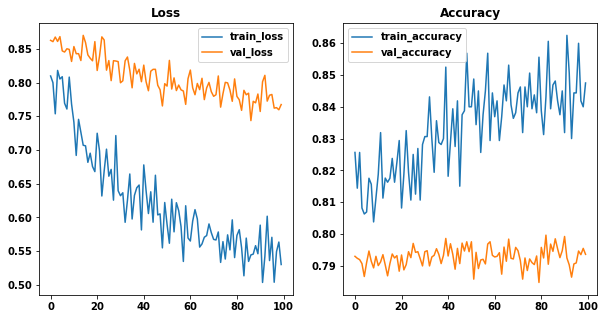

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(filters=6, kernel_size=5, activation='tanh', padding='same',strides=1,
                        input_shape=(227, 227, 1)))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('tanh'))
model.add(layers.Conv2D(filters=16, kernel_size=5, activation='tanh', padding='valid',strides=1,))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('tanh'))
model.add(layers.Conv2D(filters=120, kernel_size=5, activation='tanh', padding='valid',strides=1,))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(8, activation='softmax'))


model.compile(optimizer = optimizers.Adam(learning_rate=0.00001),
              loss= losses.CategoricalCrossentropy(),
              metrics = ['accuracy', Precision(), Recall()])

model.summary()

csv_logger = CSVLogger('./logs/LeNet.log', separator=',', append=False)

results = model.fit(train_generator,
                    steps_per_epoch=200,  # Number of training samples to pull per epoch
                    epochs=100,  # Number of epochs
                    validation_data=val_generator,
                    validation_freq=1,
                    validation_steps=300,  # Number of validation samples to run validation on
                    callbacks = [csv_logger,lr_schd_cb,best_model]
                    )

display_model_trainTestGraphs(results)

In [25]:
m = models.load_model('tf_leNet_checkpoints/_Model_1.hdf5')

In [26]:
m.evaluate(val_generator)

443/443 [==============================] - 10s 23ms/step - loss: 0.7575 - accuracy: 0.7949 - precision_3: 0.8039 - recall_3: 0.7837


[0.75752854347229, 0.7949206233024597, 0.8038932085037231, 0.7837036848068237]

# Visualizations

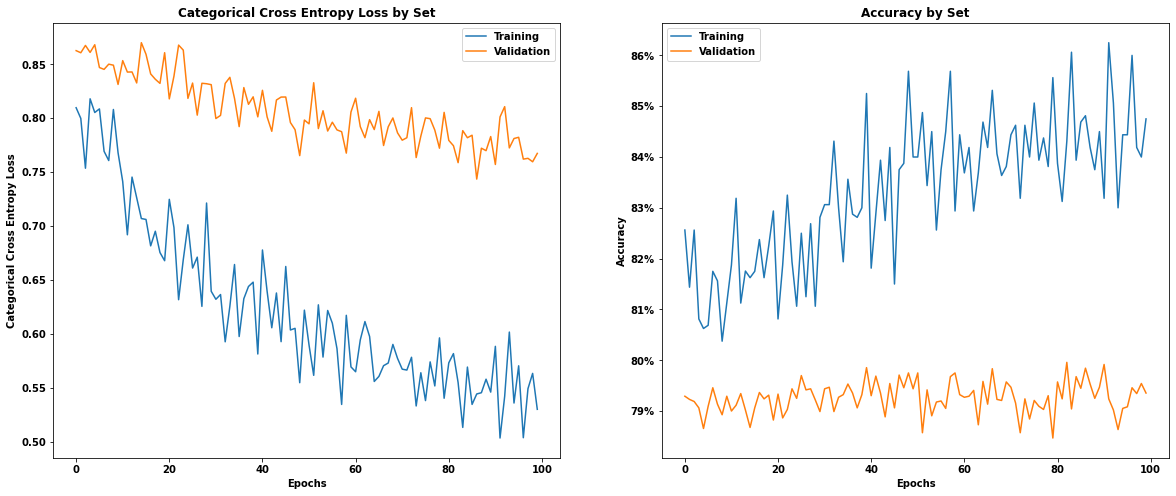

In [27]:
model_log = pd.read_csv('./logs/LeNet.log')


train_loss = model_log['loss']
train_acc = model_log['accuracy']    

val_loss = model_log['val_loss']
val_acc = model_log['val_accuracy']

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 8))


ax1.plot(model_log['epoch'],train_loss)
ax1.plot(model_log['epoch'],val_loss)
ax1.set_title('Categorical Cross Entropy Loss by Set')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Categorical Cross Entropy Loss')
ax1.legend(['Training', 'Validation'])

ax2.plot(model_log['epoch'],train_acc)
ax2.plot(model_log['epoch'],val_acc)
ax2.set_title('Accuracy by Set')
ax2.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(f'{round(x*100)}%'))
)
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(['Training', 'Validation'])

plt.savefig('./savedFigs/LeNet_Performance.jpg', dpi='figure', 
          bbox_inches='tight', pad_inches=0.1,
          facecolor='auto', edgecolor='auto',
         )

plt.show()

# Conclusion
The model performance on both validation loss and accuracy is terrible. Discarded. My intuition suggest with a smaller learning rate and a much long training span might yield better results